**Introduction**

Cyclistic is a bike-share service that operates across a major urban center, offering a flexible and eco-friendly transportation option to its residents. With a diverse user base ranging from annual members to casual riders, understanding the distinct usage patterns of these two segments is crucial for the company's strategic planning and growth. This project aims to delve into Cyclistic's comprehensive trip data for the year 2019 to uncover how annual members and casual riders utilize the bike-share service differently.Through this analytical journey, the ultimate goal is to empower Cyclistic with data-driven recommendations that drive user satisfaction and business profitability.

In [85]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [86]:
df1 = pd.read_csv('/Users/peerapongchaolumbuacharat/Downloads/Divvy_Trips_2019_Q1.csv')
df2 = pd.read_csv('/Users/peerapongchaolumbuacharat/Downloads/Divvy_Trips_2019_Q2.csv')
df3 = pd.read_csv('/Users/peerapongchaolumbuacharat/Downloads/Divvy_Trips_2019_Q3.csv')
df4 = pd.read_csv('/Users/peerapongchaolumbuacharat/Downloads/Divvy_Trips_2019_Q4.csv')

**Data Exploration**

In [87]:
df1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [88]:
df1.shape

(365069, 12)

In [89]:
df2.head()

,01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0


In [90]:
df2.shape

(1108163, 12)

In [91]:
df3.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN


In [92]:
df3.shape

(1640718, 12)

In [93]:
df4.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987.0
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998.0
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991.0
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990.0
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987.0


In [94]:
df4.shape

(704054, 12)

As df2 has different column names to other dfs. The column name of df2 will be changed to align with the rest of the dataframe in order to stack the rows later

In [95]:
df2.columns = df1.columns

Check that all dfs have the same column names

In [96]:
print(df2.columns == df1.columns)
print(df2.columns == df3.columns)
print(df2.columns == df4.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True]


In [97]:
merged_df = pd.concat([df1, df2, df3, df4], axis=0)

In [98]:
merged_df.head(10)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0
5,21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983.0
6,21742449,2019-01-01 00:16:06,2019-01-01 00:19:03,2708,177.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984.0
7,21742450,2019-01-01 00:18:41,2019-01-01 00:20:21,2796,100.0,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990.0
8,21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,"1,727.0",150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995.0
9,21742452,2019-01-01 00:19:18,2019-01-01 00:24:54,3939,336.0,268,Lake Shore Dr & North Blvd,141,Clark St & Lincoln Ave,Subscriber,Male,1996.0


In [99]:
merged_df.tail()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
704049,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,"1,172.0",112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981.0
704050,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,"1,533.0",90,Millennium Park,90,Millennium Park,Subscriber,Male,1992.0
704051,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967.0
704052,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970.0
704053,25962904,2019-12-31 23:57:17,2019-12-31 23:59:18,5930,120.0,256,Broadway & Sheridan Rd,240,Sheridan Rd & Irving Park Rd,Subscriber,Male,1982.0


In [100]:
merged_df.describe()

,trip_id,bikeid,from_station_id,to_station_id,birthyear
count,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06,3.279253e+06
mean,2.391563e+07,3.380252e+03,2.016659e+02,2.026363e+02,1.984074e+03
std,1.212667e+06,1.902511e+03,1.560798e+02,1.562388e+02,1.086898e+01
min,2.174244e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.759000e+03
25%,2.287379e+07,1.727000e+03,7.700000e+01,7.700000e+01,1.979000e+03
50%,2.396232e+07,3.451000e+03,1.740000e+02,1.740000e+02,1.987000e+03
75%,2.496370e+07,5.046000e+03,2.890000e+02,2.910000e+02,1.992000e+03
max,2.596290e+07,6.946000e+03,6.730000e+02,6.730000e+02,2.014000e+03


In [101]:
merged_df.info

<bound method DataFrame.info of          trip_id           start_time             end_time  bikeid  \
0       21742443  2019-01-01 00:04:37  2019-01-01 00:11:07    2167   
1       21742444  2019-01-01 00:08:13  2019-01-01 00:15:34    4386   
2       21742445  2019-01-01 00:13:23  2019-01-01 00:27:12    1524   
3       21742446  2019-01-01 00:13:45  2019-01-01 00:43:28     252   
4       21742447  2019-01-01 00:14:52  2019-01-01 00:20:56    1170   
...          ...                  ...                  ...     ...   
704049  25962900  2019-12-31 23:56:13  2020-01-01 00:15:45    2196   
704050  25962901  2019-12-31 23:56:34  2020-01-01 00:22:08    4877   
704051  25962902  2019-12-31 23:57:05  2020-01-01 00:05:46     863   
704052  25962903  2019-12-31 23:57:11  2020-01-01 00:05:45    2637   
704053  25962904  2019-12-31 23:57:17  2019-12-31 23:59:18    5930   

       tripduration  from_station_id                    from_station_name  \
0             390.0              199              

**Clean Data**

Check if there are any missing values

In [102]:
# Check if there are any missing values in the DataFrame
any_missing = merged_df.isnull().values.any()

# Count of missing values for each column
missing_counts = merged_df.isnull().sum()

# Percentage of missing values for each column
missing_percentage = (missing_counts / len(merged_df)) * 100

# Count of missing values for each row
row_missing_counts = merged_df.isnull().sum(axis=1)

# Rows with any missing values
rows_with_missing = merged_df[merged_df.isnull().any(axis=1)]

# Print the results
print(f"Any missing values in DataFrame: {any_missing}")
print("\nCount of missing values for each column:")
print(missing_counts)
print("\nPercentage of missing values for each column:")
print(missing_percentage)
print("\nRows with missing values:")
print(rows_with_missing)


Any missing values in DataFrame: True

Count of missing values for each column:
trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               559206
birthyear            538751
dtype: int64

Percentage of missing values for each column:
trip_id               0.000000
start_time            0.000000
end_time              0.000000
bikeid                0.000000
tripduration          0.000000
from_station_id       0.000000
from_station_name     0.000000
to_station_id         0.000000
to_station_name       0.000000
usertype              0.000000
gender               14.646554
birthyear            14.110802
dtype: float64

Rows with missing values:
         trip_id           start_time             end_time  bikeid  \
19      21742463  2019-01-01 00:29:19  2

Found missing values in 'gender' and 'birthyear' columns. The strategy to handle the missing values is to romove rows that contain missing values entirely.

In [103]:
#Drop rows that contain missing values

cleaned_df = merged_df.dropna()
old_shape = merged_df.shape
new_shape = cleaned_df.shape
print(f"The shape before dropping rows with missing values is: {old_shape}")
print(f"The shape after dropping rows with missing values is: {new_shape}")

      

The shape before dropping rows with missing values is: (3818004, 12)
The shape after dropping rows with missing values is: (3258796, 12)


In [104]:
#check if there is still missing values in the dataframe
cleaned_df.isnull().values.any()

False

**Feature Engineering**

In [105]:
#Check datatype of each column. The datatype of 'tripduration' must be converted to numeric in order to calculate statistical measures.
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3258796 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_id            int64  
 1   start_time         object 
 2   end_time           object 
 3   bikeid             int64  
 4   tripduration       object 
 5   from_station_id    int64  
 6   from_station_name  object 
 7   to_station_id      int64  
 8   to_station_name    object 
 9   usertype           object 
 10  gender             object 
 11  birthyear          float64
dtypes: float64(1), int64(4), object(7)
memory usage: 323.2+ MB


In [106]:
cleaned_df = cleaned_df.copy()

# Convert the datatype of 'tripduration' to numeric
cleaned_df.loc[:, 'tripduration'] = pd.to_numeric(cleaned_df['tripduration'], errors='coerce')


In [107]:
#Check that the datatype of 'tripduration' is now changed
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3258796 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_id            int64  
 1   start_time         object 
 2   end_time           object 
 3   bikeid             int64  
 4   tripduration       float64
 5   from_station_id    int64  
 6   from_station_name  object 
 7   to_station_id      int64  
 8   to_station_name    object 
 9   usertype           object 
 10  gender             object 
 11  birthyear          float64
dtypes: float64(2), int64(4), object(6)
memory usage: 323.2+ MB


Process the data for further analysis

In [108]:
cleaned_df = cleaned_df.copy()
#Convert these columns into datetime object
cleaned_df.loc[:,'start_time'] = pd.to_datetime(cleaned_df['start_time'])
cleaned_df.loc[:,'end_time'] = pd.to_datetime(cleaned_df['end_time'])

In [109]:
cleaned_df['ride_length'] = cleaned_df['end_time'] - cleaned_df['start_time']

In [110]:
cleaned_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_length
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,0 days 00:06:30
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,0 days 00:07:21
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,0 days 00:13:49
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,NaN,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,0 days 00:29:43
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,0 days 00:06:04


In [111]:
cleaned_df.describe()

,trip_id,bikeid,tripduration,from_station_id,to_station_id,birthyear,ride_length
count,3.258796e+06,3.258796e+06,2.346918e+06,3.258796e+06,3.258796e+06,3.258796e+06,3258796
mean,2.391703e+07,3.390371e+03,5.075589e+02,2.049440e+02,2.054959e+02,1.984083e+03,0 days 00:17:51.119631606
std,1.241564e+06,1.905420e+03,2.299662e+02,1.559652e+02,1.556257e+02,1.085970e+01,0 days 05:46:12.558607595
min,2.174244e+07,1.000000e+00,6.100000e+01,2.000000e+00,2.000000e+00,1.759000e+03,-1 days +23:03:38
25%,2.282444e+07,1.735000e+03,3.190000e+02,8.100000e+01,8.100000e+01,1.979000e+03,0 days 00:06:20
50%,2.397144e+07,3.465000e+03,4.810000e+02,1.760000e+02,1.760000e+02,1.987000e+03,0 days 00:10:31
75%,2.501124e+07,5.061000e+03,6.820000e+02,2.910000e+02,2.930000e+02,1.992000e+03,0 days 00:17:56
max,2.596290e+07,6.946000e+03,9.990000e+02,6.730000e+02,6.730000e+02,2.014000e+03,104 days 19:43:54


In [112]:
#Segment the data based on usertype
members = cleaned_df[cleaned_df['usertype'] == 'Subscriber']
casual_riders = cleaned_df[cleaned_df['usertype'] == 'Customer']

**Analyze usage patterns**

In [113]:
#Count the number of rides per user type
ride_counts = cleaned_df['usertype'].value_counts()
ride_counts

Subscriber    2914616
Customer       344180
Name: usertype, dtype: int64

In [114]:
member_counts = ride_counts['Subscriber']
casual_counts = ride_counts['Customer']
Total_counts = member_counts + casual_counts

#Calculate the percentage of each ride counts
member_percentage = (member_counts/Total_counts)*100
casual_percentage = (casual_counts/Total_counts)*100

#Print the percentage
print(f"Member Percentage: {member_percentage:.2f}%")
print(f"Casual Rider Percentage: {casual_percentage:.2f}%")


Member Percentage: 89.44%
Casual Rider Percentage: 10.56%


In [115]:
cleaned_df.groupby('usertype')['tripduration'].mean()

usertype
Customer      628.037229
Subscriber    501.134919
Name: tripduration, dtype: float64

In [116]:
cleaned_df.groupby('usertype')['tripduration'].median()

usertype
Customer      638.0
Subscriber    473.0
Name: tripduration, dtype: float64

In [117]:
#Extract hour from the 'start_time' column
cleaned_df['start_hour'] = cleaned_df['start_time'].dt.hour

# Calculate the mode of the start hour for each user type
peak_hour = cleaned_df.groupby('usertype')['start_hour'].agg(lambda x: x.mode())

peak_hour

usertype
Customer      17
Subscriber    17
Name: start_hour, dtype: int64

In [118]:
#Look at the usage patterns by month
# Extract month from the 'start_time' column
cleaned_df['start_month'] = cleaned_df['start_time'].dt.month

# Count rides by month for each user type
monthly_usage = cleaned_df.groupby(['start_month', 'usertype']).size().unstack()

monthly_usage

usertype,Customer,Subscriber
start_month,,
1,1187,97998
2,732,92781
3,4015,148644
4,13123,216244
5,23704,283865
6,42645,343027
7,75406,378254
8,83208,399975
9,55502,361023


In [119]:
# Find the top 5 start stations for each user type
top_stations = cleaned_df.groupby('usertype')['from_station_name'].value_counts().groupby(level=0).head(5)
top_stations

usertype    from_station_name           
Customer    Streeter Dr & Grand Ave         16112
            Lake Shore Dr & Monroe St        9886
            Michigan Ave & Oak St            7113
            Lake Shore Dr & North Blvd       6578
            Millennium Park                  6287
Subscriber  Canal St & Adams St             50533
            Clinton St & Madison St         45668
            Clinton St & Washington Blvd    45118
            Columbus Dr & Randolph St       31098
            Franklin St & Monroe St         30742
Name: from_station_name, dtype: int64

Key business problem: How annual members and casual riders use Cyclistic bikes differently

Here's the breakdown of the findings

1. Ride Frequency:
The data shows that annual members use the service approximately 9 times more often than casual riders. This suggests that members are likely to use the service for regualr commutes amd frequent short trips. This insight highlight the loyalty and consistent usage of annual members
2. Monthly Usage Patterns:
The data shows that members have higher ride counts than casual riders every month. This indicates that annual members regularly use the service throughout the year.
3. Trip Duration
Annual members have shorter trip duration. This could suggest that annual members use the service for regular commuting, where as casual riders use the service for leisure or non regular longer rides.

**Data Visualization**

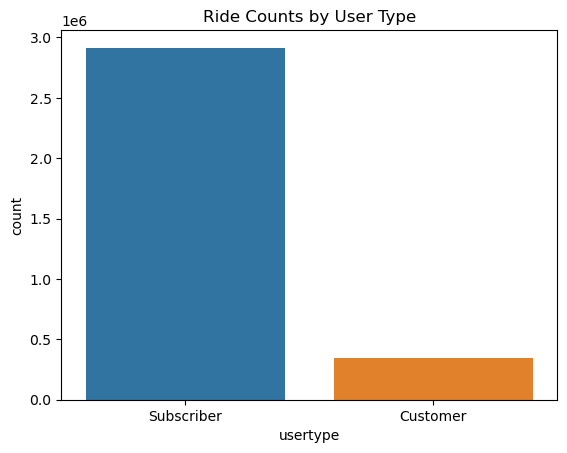

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot ride counts by user type
sns.countplot(data=cleaned_df, x='usertype')
plt.title('Ride Counts by User Type')
plt.show()



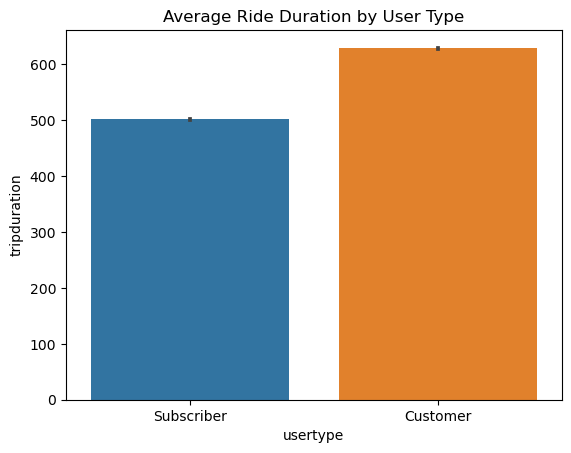

In [121]:
# Plot average ride duration by user type
sns.barplot(data=cleaned_df, x='usertype', y='tripduration')
plt.title('Average Ride Duration by User Type')
plt.show()



<module 'matplotlib.pyplot' from '/Users/peerapongchaolumbuacharat/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

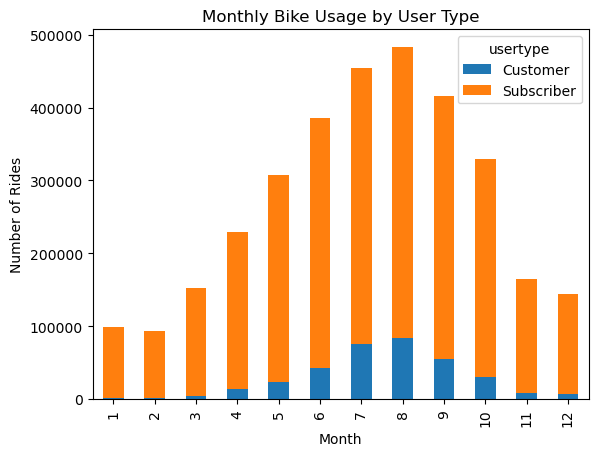

In [122]:
# Plot monthly usage patterns for each user type
monthly_usage.plot(kind='bar', stacked=True)
plt.title('Monthly Bike Usage by User Type')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt
